### Imports

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt 
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
import numpy as np
from IPython.display import Image

### Téléchargement du fichier Cif

In [2]:
with MPRester("zJnMwSh4qdHWgiI1") as m:

    # Structure for material id
    bstructure = m.get_bandstructure_by_material_id("mp-8175")

# Analyse de la bande interdite

In [3]:
bgap = bstructure.get_band_gap()
Eband = bgap.get('energy')
print("Energie de la bande interdite : " + str(Eband) + "eV")
tf = bgap.get('direct')
if tf == False :
    print("La bande interdite est indirect.")
else :
    print("La bande interdite est direct")
print("Vecteur de transition : " + bgap["transition"])
band_plot = plotter.BSPlotter(bstructure)
data  = band_plot.bs_plot_data()




Energie de la bande interdite : 0.8820000000000001eV
La bande interdite est indirect.
Vecteur de transition : Z-\Gamma


La bande interdite a une énergie de l'ordre de l'électronvolt, on peut donc considérer que le cristal a un comportement semi conducteur. Ensuite, on apprend que la bande interdite est indirect. On peut confirmer ce résultat à l'aide du vecteur de transition : le maximum de la bande de valence est en Z alors que le minimum de la bande de conduction est en Γ.

### Analyse de la première bande de conduction

In [4]:
cbm = bstructure.get_cbm()
ind_cbm = cbm.get("band_index")
e_cbm = cbm.get("energy")


print("Energie du minimum de la bande de conduction : "+ str(e_cbm))
print("Numéro de la bande contenant le CBM : "+str(ind_cbm))
print("Valeur de l'énergie sur le graphe E-Ef : " + str(e_cbm - data.get('zero_energy')))


Energie du minimum de la bande de conduction : 3.378
Numéro de la bande contenant le CBM : defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})
Valeur de l'énergie sur le graphe E-Ef : 0.8820000000000001


La bande contenant le minimum de la bande de conduction est la bande 17.

### Analyse de la dernière bande de valence

In [5]:
vbm = bstructure.get_vbm()
ind_vbm = vbm.get("band_index")
e_vbm = vbm.get("energy")


print("Energie du maximum de la bande de valence : "+ str(e_vbm))
print("Numéro de la bande contenant le VBM : "+str(ind_vbm))
print("Valeur de l'énergie sur le graphe E-Ef : " + str(e_vbm - data.get('zero_energy')))


Energie du maximum de la bande de valence : 2.496
Numéro de la bande contenant le VBM : defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16]})
Valeur de l'énergie sur le graphe E-Ef : 0.0


Les bande contenant le maximum de la bande de conduction sont les bande 16 et 17. Donc, la dernière bande de valence est la bande 16.

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

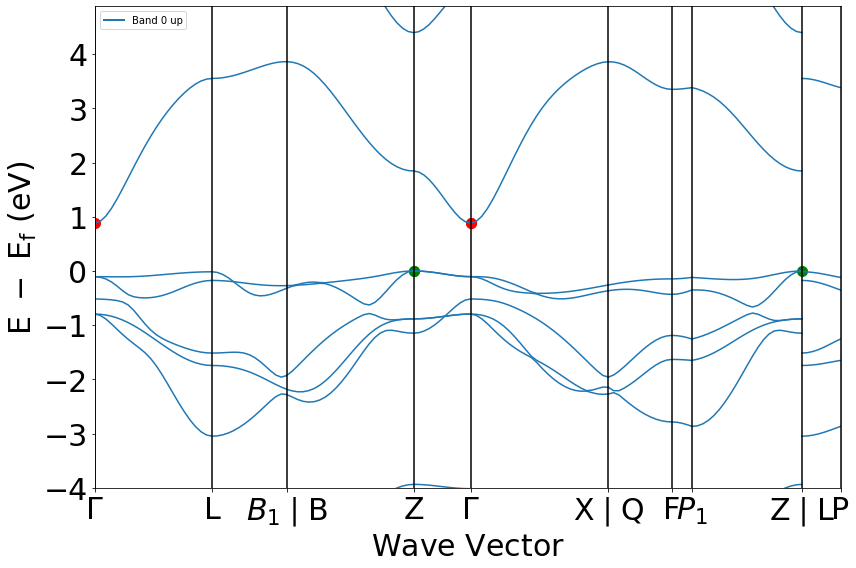

In [6]:
band_plot.get_plot(vbm_cbm_marker=True)

On observe respectivement les VBMs et les CBMs en vert et en rouge.

# Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

In [7]:
distances = data.get('distances')
energy = data.get('energy')

#On initialise les listes contenant les valeurs des énergies dans les bandes 16 et 17
enerv16 = []
enerc17 = []
#On initialise les listes contenant les pentes des bandes 16 et 17
slopev16 = []
slopec17 = []

#On récupère les valeurs des énergies
for i in range(9):
    enerv16.append(data['energy']['1'][i][16])
    enerc17.append(data['energy']['1'][i][17])
    
#Pour chaque itération de la boucle :
#On calcule la longueur de chaque intervalle de kpoints
#On calcule la différence entre la valeur de l'énergie à gauche de l'intervalle et celle à droite, pour les bandes 16 et 17
#On calcules les pentes et on les ajoute à la liste correspondante
for i in range(len(distances)):
    deltax = abs(distances[i][-1]-distances[i][1])
    deltayc = abs(enerc17[i][0] - enerc17[i][-1])
    deltayv = abs(enerv16[i][0] - enerv16[i][-1])
    slopev16.append(deltayv/deltax)
    slopec17.append(deltayc/deltax)
    
#On récupère les pentes maximale et minimal de la bande 17
slopecmax = max(slopec17)

indexcmax = list(slopec17).index(max(slopec17))

slopecmin = min(slopec17)
indexcmin = list(slopec17).index(min(slopec17))


#On récupère les pentes maximale et minimal de la bande 16
slopevmax = max(slopev16)
indexvmax = list(slopev16).index(max(slopev16))
slopevmin = min(slopev16)
indexvmin = list(slopev16).index(min(slopev16))


print("Pour la première bande de conduction :")
print("La pente maximale est " + str(slopecmax) + " et se situe dans l'intervalle "+ str(indexcmax)+".")
print("La pente minimale est " + str(slopecmin) + " et se situe dans l'intervalle "+ str(indexcmin)+".")
print("\n")
print("Pour la dernière bande de valence :")
print("La pente maximale est " + str(slopevmax) + " et se situe dans l'intervalle "+ str(indexvmax)+".")
print("La pente minimale est " + str(slopevmin) + " et se situe dans l'intervalle "+ str(indexvmin)+".")



Pour la première bande de conduction :
La pente maximale est 2.6749014831908218 et se situe dans l'intervalle 0.
La pente minimale est 0.24235163100590573 et se situe dans l'intervalle 6.


Pour la dernière bande de valence :
La pente maximale est 0.4163361788685212 et se situe dans l'intervalle 1.
La pente minimale est 0.09033513564109914 et se situe dans l'intervalle 0.


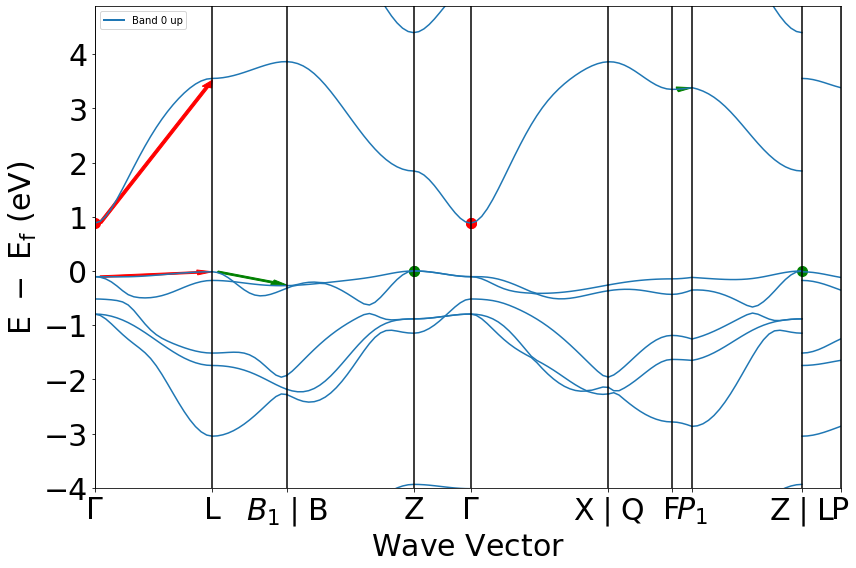

In [8]:
band_plot.get_plot(vbm_cbm_marker=True)

#On ajoute les flèches pour représenter les plus grandes (petites) dispersions

plt.arrow(distances[0][1],enerc17[0][0],distances[0][-1]-distances[0][1],enerc17[0][-1] - enerc17[0][1], color='red',width=0.03,length_includes_head=True)

plt.arrow(distances[6][1],enerc17[6][0],distances[6][-1]-distances[6][1],enerc17[6][-1] - enerc17[6][1], color='green',width=0.03,length_includes_head=True)

plt.arrow(distances[1][1],enerv16[1][0],distances[1][-1]-distances[1][1],enerv16[1][-1] - enerv16[1][1], color='green',width=0.03,length_includes_head=True)

plt.arrow(distances[0][1],enerv16[0][0],distances[0][-1]-distances[0][1],enerv16[0][-1] - enerv16[0][1], color='red',width=0.03,length_includes_head=True)


Le maximum et le minimum de dispersion de la bande de valence se trouvent respectivement dans la direction Γ-L (représentée par la flèche rouge) et dans la direction B1|B (représentée par la flèche verte).

Le maximum et le minimum de dispersion de la bande de conduction se trouvent respectivement dans la direction Γ-L (représentée par la flèche rouge) et dans la direction F-P1 (représentée par la flèche verte).

# Calcule de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. 

La formule permettant de calculer la masse effective est la suivante : 

<div>
<img src="mfformule.jpg" width="200"/>
</div>


 - ℏ est la constante de Planck
 - k est le vecteur d'onde
 - E est l'énergie
 En considérant la dispersion comme parabolique, nous avons donc une équation de la forme $E = ak² + bk + c$.
 Une fois que les constantes de l'équation sont déterminées, on peut calculer la masse effective à l'aide de la relation suivante :
 <center>
    $m^{*} = \frac{ℏ²}{2a}$


In [9]:
#Initialisation des données utiles
hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
elecv = 1.602176634*10**(-19)
angstrom = 10**(-10)

In [10]:
#On détermine la parabole d'approximation autour du CBM
cbm1 = data.get('cbm')
kc = []
ec = []
kc.append(distances[3][-2])
ec.append(data['energy']['1'][3][17][-2])
kc.append(cbm1[1][0])
ec.append(cbm1[1][1])
kc.append(distances[4][2])
ec.append(data['energy']['1'][3][17][2])
cpoly = np.polyfit(kc,ec,2)

#On détermine la parabole d"approximation autour du vbm
vbm1 = data.get('vbm')
kv = []
ev = []
kv.append(distances[2][-2])
ev.append(data['energy']['1'][2][16][-2])
kv.append(vbm1[1][0])
ev.append(vbm1[1][1])
kv.append(distances[3][2])
ev.append(data['energy']['1'][3][16][2])
vpoly = np.polyfit(kv,ev,2)

On peut maintenant tracer les paraboles sur le graphe de structure des bandes électroniques.

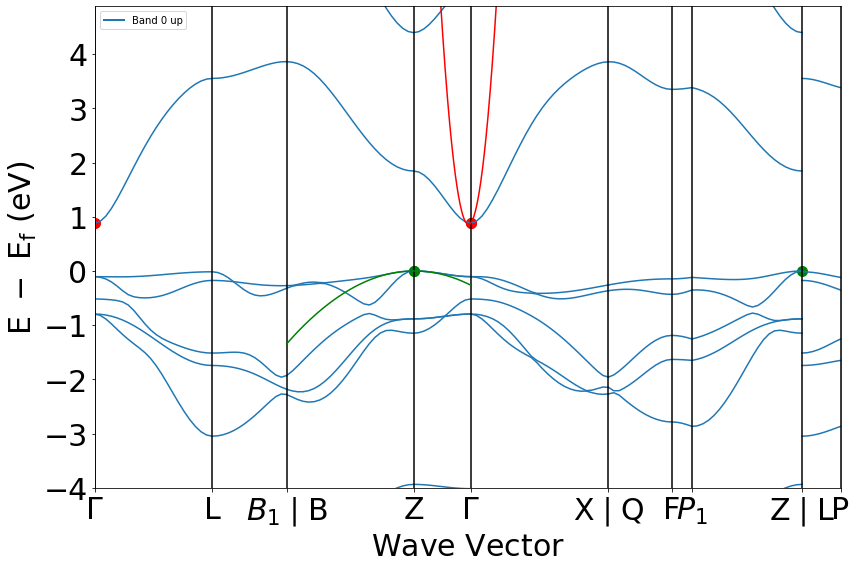

In [11]:
xc = np.linspace(distances[3][0],distances[4][-1], 1000)
xv = np.linspace(distances[2][0],distances[3][-1], 1000)

band_plot.get_plot(vbm_cbm_marker=True)
plt.plot(xc,np.polyval(cpoly,xc),'r')
plt.plot(xv,np.polyval(vpoly,xv),'g')
plt.show()

On peut maintenant déterminer les équations des paraboles ainsi que les masses effectives.

In [13]:
print("Pour la première bande de conduction :")
print("L'équation de la parabole d'approximation autour du CBM est : y(k) = " +str(cpoly[0]) + "k² + "+str(cpoly[1]) + "k + "+str(cpoly[2]))
print("Dérivée seconde : " +str(2*cpoly[0]) +" eV\u212b\u00b2")
print("Masse effective : " + str(hbar2/(2*cpoly[0]*elecv*(angstrom)**2)) + " kg")
print("\n")


print("Pour la dernière bande de valence :")
print("L'équation de la parabole d'approximation autour du CBM est : y(k) = " +str(vpoly[0]) + "k² + "+str(vpoly[1]) + "k + "+str(vpoly[2]))
print("Dérivée seconde : " +str(2*vpoly[0]) +" eV\u212b\u00b2")
print("Masse effective : " + str(abs(hbar2/(2*vpoly[0]*elecv*(angstrom)**2))) + " kg")

Pour la première bande de conduction :
L'équation de la parabole d'approximation autour du CBM est : y(k) = 66.27802474236854k² + -441.3445342253489k + 735.5844588349461
Dérivée seconde : 132.5560494847371 eVÅ²
Masse effective : 5.236515115603116e-32 kg


Pour la dernière bande de valence :
L'équation de la parabole d'approximation autour du CBM est : y(k) = -1.0408604659289167k² + 5.9270571774647305k + -8.437685448432221
Dérivée seconde : -2.0817209318578334 eVÅ²
Masse effective : 3.334413110656393e-30 kg
